My girlfriend recently said on the phone to me, 'You probably take an hour on average to reply every time I text you.' I then asked myself, how long does it take me to reply? To answer this question I would need to accesss the metadata from my imessages.. I was not entirely sure how to do this, but upon searching around for how to get these data I found a brilliant app by Ryan D'souza, the [iMessageAnalyzer](https://github.com/dsouzarc/iMessageAnalyzer). This allowed me to quickly download a csv of my conversation of interest.


Here I will explore the average time it takes me to reply to my girlfriend over iMessage. The data have been masked so that my name is 'me', and my girlfriend is 'gf'; the column containing the text message at each time point was removed.

In [23]:
import pandas as pd 

In [24]:
gf_txt = pd.read_csv('gftxt.csv', names=['person', 'time'], parse_dates=True, header=1)

It looks like all the information I need is in the first two columns: 'person' and 'time'. I'll store a new instance of the data frame. 

In [25]:
gf_txt.head()

,person,time
1,gf,2015-06-21 21:56:16 +0000
2,me,2015-06-21 22:00:32 +0000
3,gf,2015-07-28 18:15:08 +0000
4,me,2015-07-28 19:15:06 +0000
5,me,2015-07-28 19:15:16 +0000


In [26]:
gf_txt.dtypes

person    object
time      object
dtype: object

Looks like I need to change the time column to datetime!

In [27]:
gf_txt['time'] = pd.to_datetime(gf_txt['time'])

In [28]:
gf_txt.head(20)

,person,time
1,gf,2015-06-21 21:56:16
2,me,2015-06-21 22:00:32
3,gf,2015-07-28 18:15:08
4,me,2015-07-28 19:15:06
5,me,2015-07-28 19:15:16
6,gf,2015-07-28 19:33:53
7,me,2015-07-28 20:02:39
8,me,2015-07-28 21:42:38
9,gf,2015-07-29 05:13:23
10,me,2015-07-29 05:14:40


In [29]:
gf_txt.dtypes

person            object
time      datetime64[ns]
dtype: object

It is evident sometimes one person texts the other twice, three times, etc... I only want the difference between rows where 'person' changes. To do this I will create a new row called pdiff which is just person shifted up so that I can compare the next row (pnext) to the current row (person). Then I need to select only rows where 'person' is not equal to 'pnext'.

In [30]:
gf_txt['pnext'] = gf_txt.person.shift(-1)
gf_alt = gf_txt.loc[gf_txt['person'] != gf_txt['pnext']].copy()
gf_alt.head()

,person,time,pnext
1,gf,2015-06-21 21:56:16,me
2,me,2015-06-21 22:00:32,gf
3,gf,2015-07-28 18:15:08,me
5,me,2015-07-28 19:15:16,gf
6,gf,2015-07-28 19:33:53,me


Great, now I can compute the time difference between the two entries. 

In [31]:
gf_alt['tdiff'] = gf_alt['time'].diff().dt.seconds.div(60, fill_value = 0)
gf_alt.head()

,person,time,pnext,tdiff
1,gf,2015-06-21 21:56:16,me,0.000000
2,me,2015-06-21 22:00:32,gf,4.266667
3,gf,2015-07-28 18:15:08,me,1214.600000
5,me,2015-07-28 19:15:16,gf,60.133333
6,gf,2015-07-28 19:33:53,me,18.616667


The dataframe now has column 'tdiff' representing the time in minutes since the last person. Becasue I have ensured that persons are truely alternating, the 'tdiff' column represents the reply time for the current person. Let's see each person's global average reply time.

In [32]:
gf_alt[gf_alt['person'] == 'Jake VanCampen'].mean()

person   NaN
time     NaN
pnext    NaN
tdiff    NaN
dtype: float64

In [33]:
gf_alt[gf_alt['person'] == 'Heidi 🐴❤️ Grompe'].mean()

person   NaN
time     NaN
pnext    NaN
tdiff    NaN
dtype: float64

Ha! It looks like Heidi actually has a longer global average time to reply at 159 minutes, whereas my global average time to reply is about 135 minutes. Let's get a visual of these data.

In [34]:
%matplotlib inline

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

In [36]:
import seaborn as sns


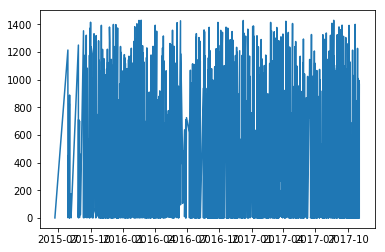

In [37]:
plt.plot(gf_alt['time'], gf_alt['tdiff'])

This is hard to visualize, it may be better to visualize using a monthly average of the difference. 

In [38]:
gf_tdex = gf_alt.filter(['person','tdiff', 'time'])
gf_tdex.head()

,person,tdiff,time
1,gf,0.000000,2015-06-21 21:56:16
2,me,4.266667,2015-06-21 22:00:32
3,gf,1214.600000,2015-07-28 18:15:08
5,me,60.133333,2015-07-28 19:15:16
6,gf,18.616667,2015-07-28 19:33:53


In [39]:
gf_monthly = gf_tdex.groupby('person').resample('M', on='time').mean().reset_index()
gf_monthly.head()
gf_monthly['time'] = gf_monthly['time'].map(lambda x: x.strftime('%Y-%m-%d'))

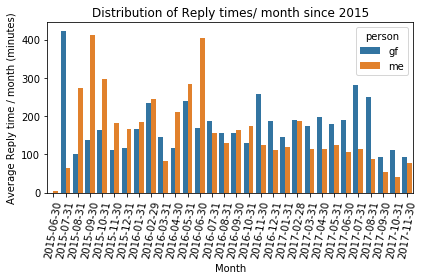

In [40]:
gf_monthly

fig, ax = plt.subplots()
sns.barplot('time', 'tdiff', data=gf_monthly, hue='person', ax=ax)
plt.xticks(rotation=80)
plt.xlabel('Month')
plt.ylabel('Average Reply time / month (minutes)')
plt.title('Distribution of Reply times/ month since 2015')
plt.tight_layout()
plt.savefig('replytimes.png', dpi=1000)

I am pretty confident now that my reply time is a little faste on average than my girlfriend.
